In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# loading data

death_comparison = pd.read_csv("C://Users//Lekshmi//Documents//Covid_19_Analysis//death_comparison.csv")
death_comparison.head(3)

,State/UTs,Death Ratio,Coverage_Pct,death_rank,national_avg_death
0,Andaman And Nicobar,1.20,248.44,1,1.097778
1,Andhra Pradesh,0.63,121.00,1,1.097778
2,Arunachal Pradesh,0.44,112.42,1,1.097778


In [48]:
death_comparison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State/UTs           36 non-null     object 
 1   Death Ratio         36 non-null     float64
 2   Coverage_Pct        36 non-null     float64
 3   death_rank          36 non-null     int64  
 4   national_avg_death  36 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.5+ KB


In [49]:
death_comparison.shape

(36, 5)

In [50]:
# correlation analysis

corr_matrix = death_comparison[["Coverage_Pct","Death Ratio"]].corr()
corr_value = corr_matrix.iloc[0,1]
print(f"deaths vs vaccines:{corr_value:.3f}")

if corr_value<-0.3:
    print("Negative Correlation = Vaccine Reduces Deaths")
elif corr_value>0.3:
    print("Positive Correlation = Concern")
else:
    print("Week Correlation")

deaths vs vaccines:-0.309
Negative Correlation = Vaccine Reduces Deaths


In [51]:
# high vs low coverage

high_coverage = death_comparison[death_comparison["Coverage_Pct"]>150]["Death Ratio"]
low_coverage = death_comparison[death_comparison["Coverage_Pct"]<120]["Death Ratio"]

print(f"low coverage %:{low_coverage.mean():.2f}")
print(f"high coverage:{high_coverage.mean():.2f}")
print(f"difference:{low_coverage.mean()-high_coverage.mean():.2f}")

national_avg = death_comparison["Death Ratio"].mean()
print(f"average national death rate:{national_avg:.2f}")

low coverage %:1.40
high coverage:1.07
difference:0.34
average national death rate:1.10


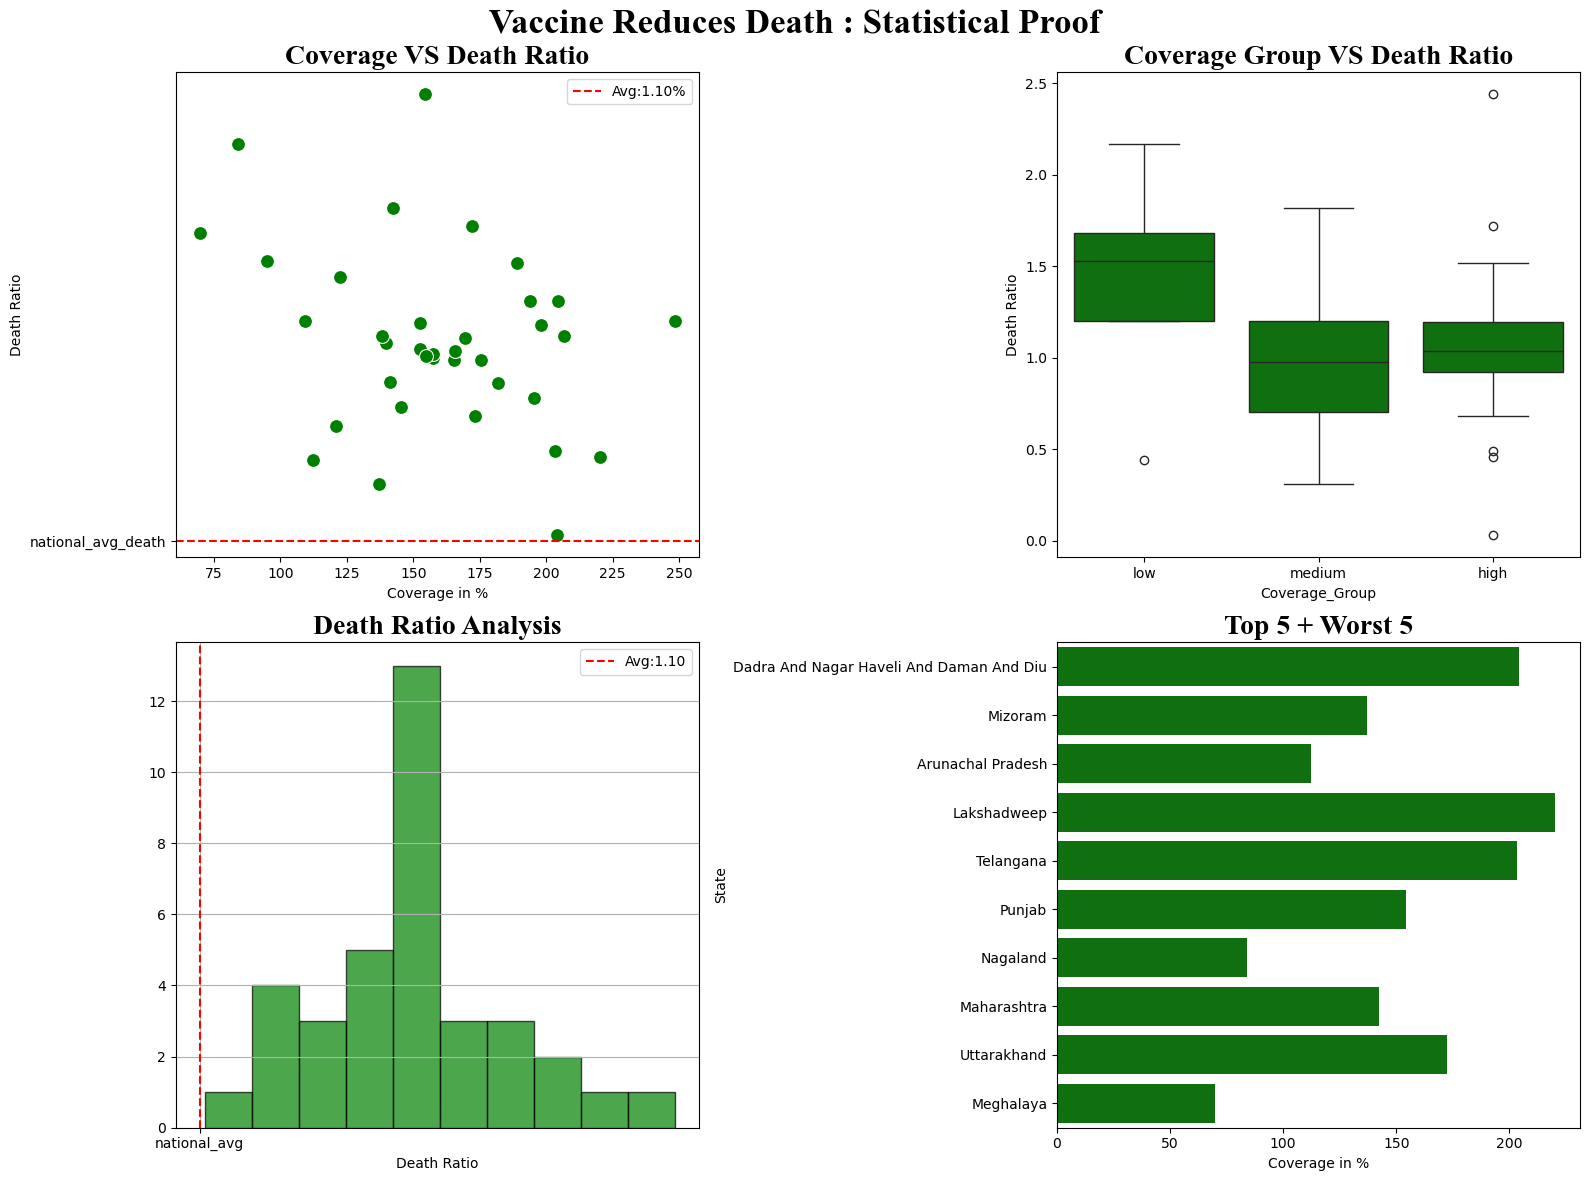

In [52]:
fig,axes = plt.subplots(2,2,figsize=(16,12))

sns.scatterplot(data=death_comparison,x="Coverage_Pct",y="Death Ratio",ax=axes[0,0],s=100,c="green")
axes[0,0].set_xlabel("Coverage in %")
axes[0,0].set_ylabel("Death Ratio")
axes[0,0].set_title("Coverage VS Death Ratio",fontsize=20,fontweight="bold",family="Times New Roman")
axes[0,0].axhline(y="national_avg_death",color="red",linestyle="--",label=f"Avg:{national_avg:.2f}%")
axes[0,0].legend()

death_comparison["Coverage_Group"] = pd.cut(death_comparison["Coverage_Pct"],bins=[0,120,150,300],labels=["low","medium","high"])
sns.boxplot(data=death_comparison,x="Coverage_Group",y="Death Ratio",ax=axes[0,1],color="green")
axes[0,1].set_title("Coverage Group VS Death Ratio",fontsize=20,fontweight="bold",family="Times New Roman")

death_comparison["Death Ratio"].hist(ax=axes[1,0],bins=10,color="green",edgecolor="black",alpha=0.7)
axes[1,0].axvline(x="national_avg",color="red",linestyle="--",label=f"Avg:{national_avg:.2f}")
axes[1,0].set_title("Death Ratio Analysis",fontsize=20,fontweight="bold",family="Times New Roman")
axes[1,0].set_xlabel("Death Ratio")
axes[1,0].legend()

top_worst = pd.concat([death_comparison.nsmallest(5,"Death Ratio"),
                      death_comparison.nlargest(5,"Death Ratio")])
sns.barplot(data=top_worst,x="Coverage_Pct",y="State/UTs",color="green",ax=axes[1,1])
axes[1,1].set_xlabel("Coverage in %")
axes[1,1].set_ylabel("State")
axes[1,1].set_title("Top 5 + Worst 5",fontsize=20,fontweight="bold",family="Times New Roman")

plt.suptitle("Vaccine Reduces Death : Statistical Proof",fontsize=25,fontweight="bold",family="Times New Roman")
plt.tight_layout()
plt.savefig("Day_6_Analysis",dpi=300,bbox_inches="tight")
plt.show()

In [53]:
results = {
    "Correlation_Value" : corr_value,
    "High_Coverage_Death_Rate" : high_coverage.mean(),
    "Low_Coverage_Death_Rate" : low_coverage.mean(),
    "Coverage_Death_Difference" : low_coverage.mean() - high_coverage.mean(),
    "National_Avg" : national_avg,
    "States_Analysed" : len(death_comparison)
}

results_df = pd.DataFrame([results])
results_df.to_csv("Results_Analysis.csv",index=False)
print("csv file loaded successfully")
print(results_df.T)

csv file loaded successfully
                                   0
Correlation_Value          -0.309307
High_Coverage_Death_Rate    1.065217
Low_Coverage_Death_Rate     1.404000
Coverage_Death_Difference   0.338783
National_Avg                1.097778
States_Analysed            36.000000
